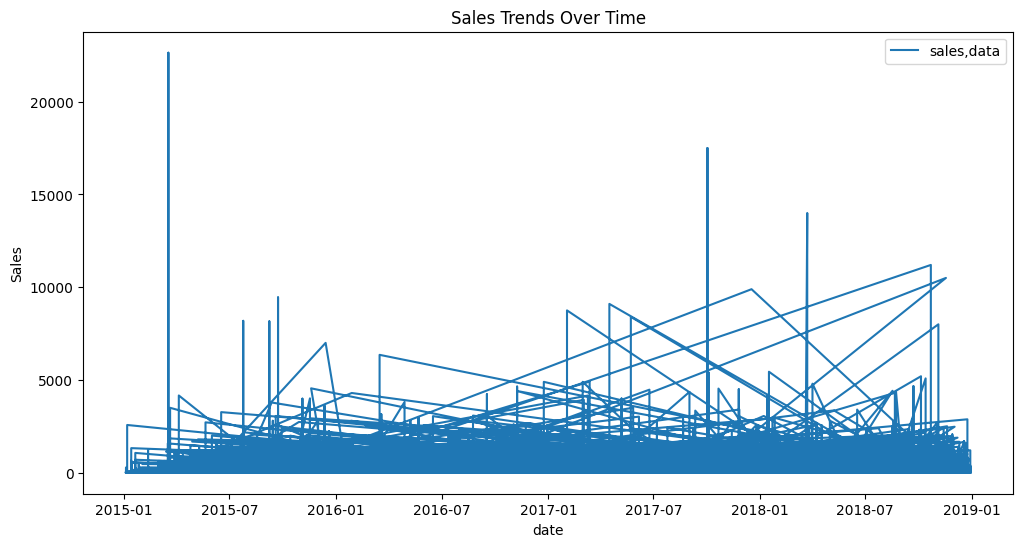

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

RMSE: 641.7184742470957


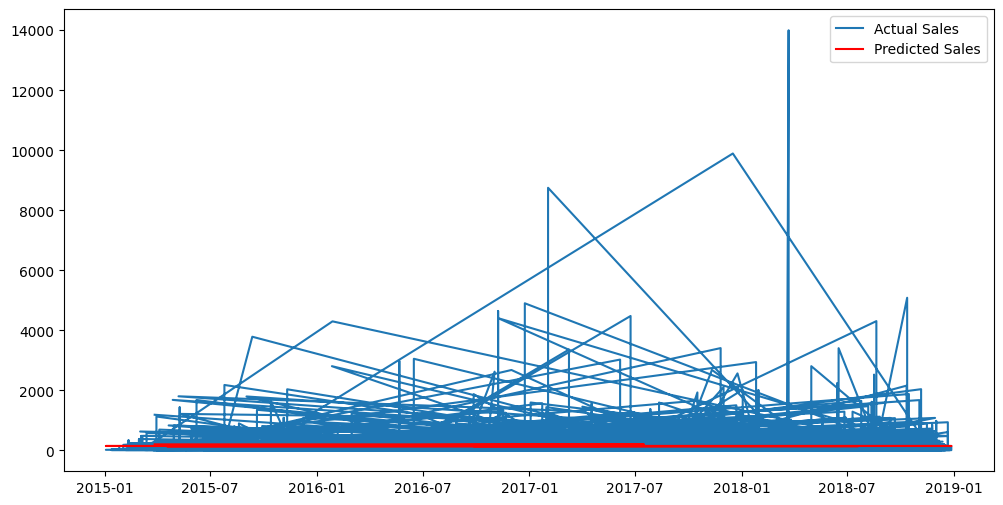

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def time_series_analysis():
    # Load dataset
    sales_data = pd.read_csv('sales_data.csv', parse_dates=['order_date'], index_col='order_date')

    selectcolumns=['sales']
    sales_data=sales_data[selectcolumns]
    # Visualizing sales trends
    plt.figure(figsize=(12, 6))
    plt.plot(sales_data, label='sales,data')
    plt.title('Sales Trends Over Time')
    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # ARIMA Model
    train_size = int(len(sales_data) * 0.8)
    train, test = sales_data[:train_size], sales_data[train_size:]

    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, forecast))
    print(f'RMSE: {rmse}')

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual Sales')
    plt.plot(test.index, forecast, color='red', label='Predicted Sales')
    plt.legend()
    plt.show()
time_series_analysis()


Accuracy: 0.6146341463414634
Precision: 0.6224489795918368
Recall: 0.5922330097087378
F1 Score: 0.6069651741293532


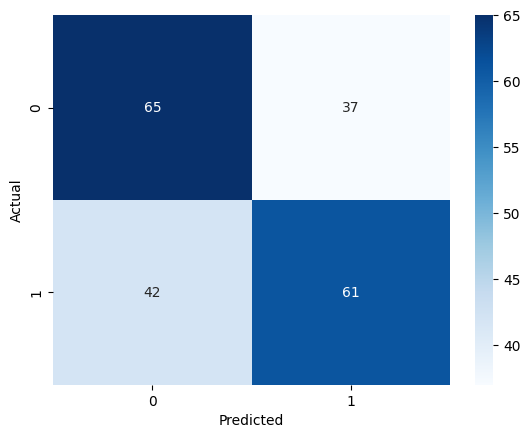

In [3]:
def heart_disease_prediction():
    # Load dataset
    heart_data = pd.read_csv('heart.csv')

    # Remove unwanted columns
    heart_data = heart_data[['age', 'chol', 'trestbps', 'target']]

    # Preprocessing
    heart_data.dropna(inplace=True)
    X = heart_data[['age', 'chol', 'trestbps']]
    y = heart_data['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1 Score: {f1}')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
heart_disease_prediction()